In [1]:
import requests # you need this module to make an API call
import pandas as pd

In [2]:
import requests

def get_number_of_jobs_T(technology):
    api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    
    # Send GET request to the API
    response = requests.get(api_url)
    
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Count how many jobs contain the technology in 'Key Skills'
        number_of_jobs = sum(technology.lower() in job.get('Key Skills', '').lower() for job in data)
        
        return technology, number_of_jobs
    else:
        print("Failed to retrieve data")
        return technology, 0


In [3]:
import requests


# List of technologies
technologies = [
    "Python", "SQL", "Java", "JavaScript", "C++", "C#", "R", "Scala", "Hadoop", 
    "Spark", "Tableau", "Power BI", "Excel", "AWS", "Azure", "GCP", "Linux", 
    "Docker", "Kubernetes", "TensorFlow", "PyTorch", "Machine Learning", 
    "Deep Learning", "Data Analysis", "Data Visualization", "Pandas", "NumPy", 
    "MATLAB"
]

# Loop through technologies and get the number of jobs for each
job_counts = []
for tech in technologies:
    technology, num_jobs = get_number_of_jobs_T(tech)
    job_counts.append((technology, num_jobs))

# Print the results
for technology, num_jobs in job_counts:
    print(f"There are {num_jobs} jobs that require {technology}.")


There are 1173 jobs that require Python.
There are 3221 jobs that require SQL.
There are 3428 jobs that require Java.
There are 2248 jobs that require JavaScript.
There are 506 jobs that require C++.
There are 526 jobs that require C#.
There are 25744 jobs that require R.
There are 138 jobs that require Scala.
There are 122 jobs that require Hadoop.
There are 105 jobs that require Spark.
There are 69 jobs that require Tableau.
There are 41 jobs that require Power BI.
There are 649 jobs that require Excel.
There are 346 jobs that require AWS.
There are 170 jobs that require Azure.
There are 29 jobs that require GCP.
There are 881 jobs that require Linux.
There are 102 jobs that require Docker.
There are 4 jobs that require Kubernetes.
There are 0 jobs that require TensorFlow.
There are 0 jobs that require PyTorch.
There are 243 jobs that require Machine Learning.
There are 46 jobs that require Deep Learning.
There are 366 jobs that require Data Analysis.
There are 49 jobs that require D

In [4]:
import pandas as pd  # For creating and managing data in DataFrame format
import requests      # For sending HTTP requests to the API


In [5]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from openpyxl import Workbook

# Create a new workbook
wb = Workbook()

# Select the active worksheet
ws = wb.active

# Optionally, you can rename the worksheet
ws.title = "Job Postings"

# Try to save the workbook
try:
    wb.save("job_postings.xlsx")
    print("Workbook 'job_postings.xlsx' created successfully!")
except PermissionError:
    print("PermissionError: Please close 'job_postings.xlsx' if it is open and try again.")


Workbook 'job_postings.xlsx' created successfully!


In [13]:
# Create a new workbook and select the active worksheet
wb = Workbook()
ws = wb.active
ws.title = "Job Postings"

# Write the headers to the worksheet
ws.append(["Technology", "Job Postings"])

# List of technologies to check
technologies = [
    "C", "C#", "C++", "Java", "JavaScript", "Python", "Scala",
    "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"
]

# Fetch job postings for each technology and write them to the worksheet
for tech in technologies:
    tech_name, count = get_number_of_jobs_T(tech)
    ws.append([tech_name, count])  # Add the technology name and job count to the spreadsheet

# Save the workbook as 'job-postings.xlsx'
wb.save("job-postings.xlsx")


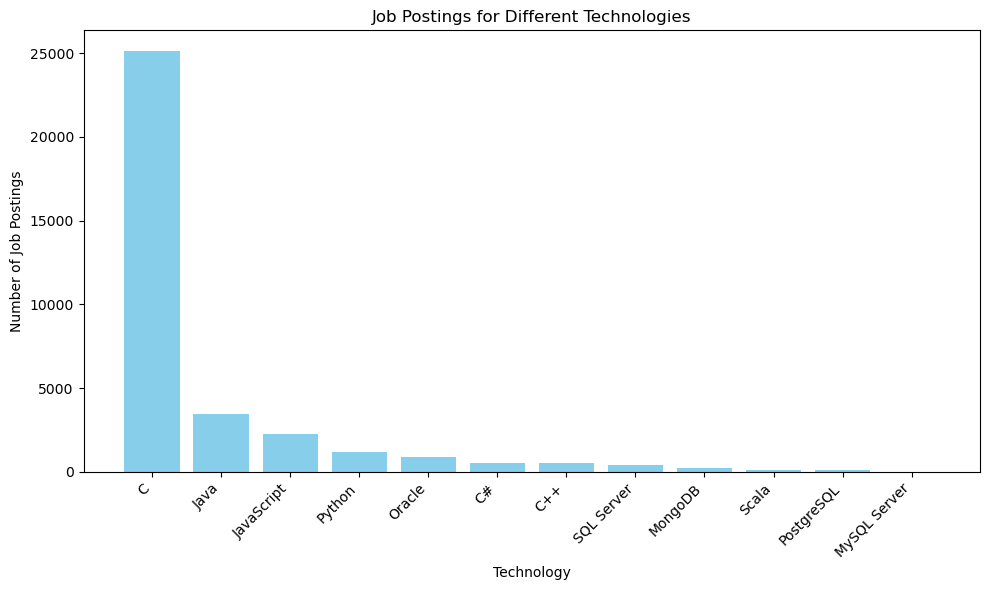

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('job-postings.xlsx')

# Sort the data by the number of job postings in descending order
df_sorted = df.sort_values(by='Job Postings', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Technology'], df_sorted['Job Postings'], color='skyblue')
plt.xlabel('Technology')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings for Different Technologies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
